# 数组和矢量运算
## 1. numpy
- numpy使用的内存更少(采用C API)
- numpy一般不使用 for 循环
- 

In [2]:
import numpy as np
my_arr = np.arange(1000000)
my_list = list(range(1000000))

In [20]:
%time for _ in range(10): my_arr2 = my_arr * 2 

Wall time: 55.6 ms


In [22]:
%time for _ in range(10): my_list2 = [x * 2 for x in my_list]

Wall time: 1.9 s


In [23]:
data = np.random.randn(2,3)#两行三列标准正态分布
help(np.random.randn)

Help on built-in function randn:

randn(...) method of numpy.random.mtrand.RandomState instance
    randn(d0, d1, ..., dn)
    
    Return a sample (or samples) from the "standard normal" distribution.
    
    .. note::
        This is a convenience function for users porting code from Matlab,
        and wraps `standard_normal`. That function takes a
        tuple to specify the size of the output, which is consistent with
        other NumPy functions like `numpy.zeros` and `numpy.ones`.
    
    .. note::
        New code should use the ``standard_normal`` method of a ``default_rng()``
        instance instead; see `random-quick-start`.
    
    If positive int_like arguments are provided, `randn` generates an array
    of shape ``(d0, d1, ..., dn)``, filled
    with random floats sampled from a univariate "normal" (Gaussian)
    distribution of mean 0 and variance 1. A single float randomly sampled
    from the distribution is returned if no argument is provided.
    
    Paramete

In [25]:
data = [1, 2, 3, 4, 5]
arr = np.array(data)
arr

array([1, 2, 3, 4, 5])

In [29]:
np.empty((3,3,3))

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

In [34]:
np.identity(5, dtype = "int32")

array([[1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1]])

## 2. numpy数组的运算
- 矢量化（vectorization）
- 数组的切片时原数组的视图，视图的改变会原封不动的反映在原数组当中,切片左闭右开
- 高维数组的切片时，传入的顺序是根据shape的维度轴向进行切片，对切片的赋值可以广播，只有冒号代表选取整个轴，且返回的是视图。
- ~操作符可以用来反转条件，在判断语句括号外
- 布尔条件要用& | 表示and or

In [38]:
arr_2d = np.array([[1,2,3],[2,3,4],[3,4,5]])
arr_2d

array([[1, 2, 3],
       [2, 3, 4],
       [3, 4, 5]])

In [41]:
print((arr_2d[0][1] == arr_2d[0,1]), arr_2d[0][1])

True 2


In [42]:
arr_2d[:2, 1:]

array([[2, 3],
       [3, 4]])

In [3]:
data = np.random.randn(3,4)
data

array([[ 1.83673521,  0.39808495, -0.33392053,  2.29344066],
       [-0.028059  , -1.24844788,  0.4606964 ,  3.01506358],
       [ 0.61654864, -0.87607537,  0.00806132, -0.35312902]])

In [4]:
data[data < 0] =0
data

array([[1.83673521, 0.39808495, 0.        , 2.29344066],
       [0.        , 0.        , 0.4606964 , 3.01506358],
       [0.61654864, 0.        , 0.00806132, 0.        ]])

In [36]:
x, y = np.modf(data)
x+y

array([[1.83673521, 0.39808495, 0.        , 2.29344066],
       [0.        , 0.        , 0.4606964 , 3.01506358],
       [0.61654864, 0.        , 0.00806132, 0.        ]])

In [31]:
arr = np.random.randn(4,6)
s = np.dot(arr,arr.T)
s.shape

(4, 4)

In [34]:
arr = np.arange(32).reshape((4,8))
arr_ = arr.transpose(1,0)
(arr.T != arr_).sum()

0

## 3. 花式索引（Fancy indexing）
- 花式索引会将数据复制到新数组当中，并非视图，是一个新数组！！

In [23]:
arr = np.empty((8,8))
arr[arr<0]=0
for i in range(8):
    arr[i][i] = i
arr = arr.astype(np.int32)

In [24]:
arr[[1,2,3,6]] #这是索引

array([[0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 2, 0, 0, 0, 0, 1],
       [0, 0, 0, 3, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0, 6, 0]])

In [25]:
arr[[1,5,7,2],[0,3,1,2]] #无论数据是几维，花式索引结果总是一维

array([0, 0, 0, 2])

In [28]:
arr[[1,5,7,2]][:,[0,3,1,2]]

array([[0, 0, 1, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 2]])

## 4. 利用数组对数据进行处理
- .any()用于检测数组中是否存在一个或多个True, .all()用来检查数组中所有元素是否都是True
- np.unique() 返回数组中数据种类的有序结果

In [50]:
points = np.arange(-5, 5, 0.1)
xs, ys= np.meshgrid(points,points)
z = np.sqrt((xs-ys)**2)
z

array([[0. , 0.1, 0.2, ..., 9.7, 9.8, 9.9],
       [0.1, 0. , 0.1, ..., 9.6, 9.7, 9.8],
       [0.2, 0.1, 0. , ..., 9.5, 9.6, 9.7],
       ...,
       [9.7, 9.6, 9.5, ..., 0. , 0.1, 0.2],
       [9.8, 9.7, 9.6, ..., 0.1, 0. , 0.1],
       [9.9, 9.8, 9.7, ..., 0.2, 0.1, 0. ]])

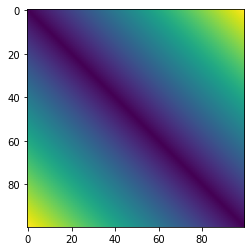

In [52]:
import matplotlib.pyplot as plt
plt.imshow(z)

In [59]:
a = np.random.randn(3,4)
b = np.where(a > 0, 2, -2)
c = np.where(a > 0, 2, a)
print(a)
print(b)
print(c)

[[-0.60999888  0.74095791  1.00142082  0.11442134]
 [-0.27234965  0.25082184 -1.10487428 -0.21661735]
 [-0.19616987  0.15377543  0.56975518 -1.2969183 ]]
[[-2  2  2  2]
 [-2  2 -2 -2]
 [-2  2  2 -2]]
[[-0.60999888  2.          2.          2.        ]
 [-0.27234965  2.         -1.10487428 -0.21661735]
 [-0.19616987  2.          2.         -1.2969183 ]]


In [61]:
b.sum(axis = 1) #行

array([ 4, -4,  0])

In [62]:
b.cumsum()

array([-2,  0,  2,  4,  2,  4,  2,  0, -2,  0,  2,  0], dtype=int32)

- 随机漫步

91


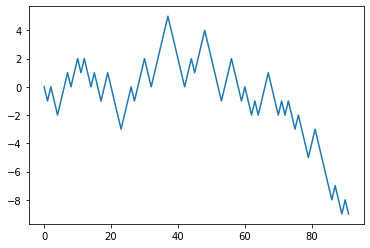

In [74]:
import random
import matplotlib.pyplot as plt
position = 0
walk = [position]
steps = 10000
for i in range(steps):
    step = 1 if random.randint(0,1)==0 else -1
    position += step
    if np.abs(position)==10:
        print(i)
        break
    walk.append(position)
plt.plot(walk)
plt.show()